# Rental Apartments in Nairobi

## This is a small project that aims as getting the average prices of rent of rental apartments using sampling techniques.

In [19]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load in the data

In [2]:
rent = pd.read_csv('rent_apts.csv')
rent

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
...,...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North","KSh 180,000",/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands","KSh 180,000",/listings/2-bedroom-apartment-for-rent-spring-...,2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North","KSh 180,000",/listings/furnished-4-bedroom-apartment-for-re...,4.0,4.0,5.0
1846,Geoscape Global Limited,"Westlands Area, Westlands","KSh 180,000",/listings/4-bedroom-apartment-for-rent-westlan...,4.0,4.0,4.0


# data cleaning

## 1. Columns

In [3]:
# new df with only the data to be used
rent = rent[['Agency', 'Neighborhood', 'Price']]
rent.head()

,Agency,Neighborhood,Price
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000"
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000"
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000"
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000"
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000"


## 2. Datatypes

In [4]:
# Check for datatypes
rent.dtypes

Agency          object
Neighborhood    object
Price           object
dtype: object

In [11]:
# Replace , with blank
rent['Price'] = rent['Price'].str.replace(',', '')

<ipython-input-11-147ee25dd15f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Price'] = rent['Price'].str.replace(',', '')


In [9]:
# Replace Ksh with blank
rent['Price'] = rent['Price'].str.replace('KSh', '')

<ipython-input-9-413e3de8b436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Price'] = rent['Price'].str.replace('KSh', '')


In [16]:
rent['Price'] = rent['Price'].astype(float)

<ipython-input-16-9ce815aa191d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Price'] = rent['Price'].astype(float)


In [18]:
# New datatypes
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   float64
dtypes: float64(1), object(2)
memory usage: 43.4+ KB


In [29]:
# Sort prices from lowest to highest
rent = rent.sort_values('Price', ascending=True)
rent

,Agency,Neighborhood,Price
18,Kitheka Musyoka,"nyali road, nyali road, Nyali Area, Nyali",12000.0
22,Kitheka Musyoka,"fisharies, mtambo bamburi road, Bamburi, Kisauni",13000.0
21,Homekenya24,"Ruaka, Kiambaa",13000.0
20,Estate Masters Limited,"MUIRU, Ruaka, Kiambaa",13000.0
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0
...,...,...,...
34,Origin Homes,"General Mathenge, Westlands",200000.0
94,Westside Real Estate,"Muringa Road, Kilimani, Dagoretti North",200000.0
14,Yellow Market,"Riverside Drive, Riverside, Westlands",220000.0
158,Serene Valley Apartments,"Kiambere Road, Upper Hill, Langata",240000.0


# sampling

Sampling method to be used is K-Means clustering

In [30]:
# Importing K means module

from sklearn.cluster import KMeans

In [31]:
rent_prices = rent[['Price']]
rent_prices

,Price
18,12000.0
22,13000.0
21,13000.0
20,13000.0
19,13000.0
...,...
34,200000.0
94,200000.0
14,220000.0
158,240000.0


In [33]:
# specify number of clusters

kmeans = KMeans(12)

In [34]:
kmeans.fit(rent_prices)

KMeans(n_clusters=12)

In [35]:
clustered_rent = kmeans.fit_predict(rent_prices)
clustered_rent

array([11, 11, 11, ...,  8,  8,  8], dtype=int32)

In [36]:
# new df with clusters
new_rent = rent.copy()

In [37]:
# add clusters
new_rent['clusters'] = clustered_rent
new_rent

,Agency,Neighborhood,Price,clusters
18,Kitheka Musyoka,"nyali road, nyali road, Nyali Area, Nyali",12000.0,11
22,Kitheka Musyoka,"fisharies, mtambo bamburi road, Bamburi, Kisauni",13000.0,11
21,Homekenya24,"Ruaka, Kiambaa",13000.0,11
20,Estate Masters Limited,"MUIRU, Ruaka, Kiambaa",13000.0,11
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,11
...,...,...,...,...
34,Origin Homes,"General Mathenge, Westlands",200000.0,4
94,Westside Real Estate,"Muringa Road, Kilimani, Dagoretti North",200000.0,4
14,Yellow Market,"Riverside Drive, Riverside, Westlands",220000.0,8
158,Serene Valley Apartments,"Kiambere Road, Upper Hill, Langata",240000.0,8


# Analysis

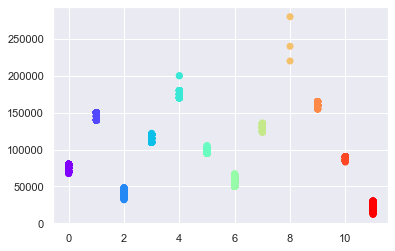

In [44]:
# As there are no other numerical values, plotted the prices against respective clusters
plt.scatter(new_rent['clusters'], new_rent['Price'], c=clustered_rent, cmap='rainbow')
plt.show()